# Hands-On Machine Learning with the MNIST dataset.
Artificial Intelligence (AI) encompasses a broad range of concepts and technologies aimed at creating systems capable of performing tasks that typically require human intelligence. 

One of the core components of AI is neural networks, which are computational models inspired by the human brain's structure and function. Neural networks consist of interconnected layers of nodes, or neurons, that process and transmit information. These networks are particularly effective in recognizing patterns and making predictions. A common application of neural networks is in image recognition, where the MNIST dataset serves as a benchmark. The MNIST dataset contains a large collection of handwritten digits, which are used to train and evaluate the performance of neural networks in accurately classifying and recognizing digit images. This dataset has become a standard for testing new algorithms and models in the field of machine learning and AI.

## Import Statements

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist # MNIST dataset, included in Keras
from keras.models import Sequential # type of model we will be using

from keras.layers import Dense, Dropout, Activation, Flatten # types of layers we will be using
from keras.utils import to_categorical # utilities for one-hot encoding of ground truth values

2024-10-23 18:03:04.061122: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 18:03:04.063331: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 18:03:04.106180: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 18:03:04.107152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 18:03:05.543651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# MNIST Dataset
The MNIST dataset is a widely used benchmark in the field of machine learning and artificial intelligence, particularly for image recognition tasks. It consists of 70,000 grayscale images of handwritten digits, each with dimensions of 28x28 pixels. The dataset is divided into 60,000 training images and 10,000 test images, providing a comprehensive set of examples for training and evaluating neural network models. The simplicity and standardized format of the MNIST dataset make it an ideal starting point for developing and testing new algorithms and models in the realm of digit classification.

Now let's load in the MNIST dataset from Keras and visualize some of the samples.

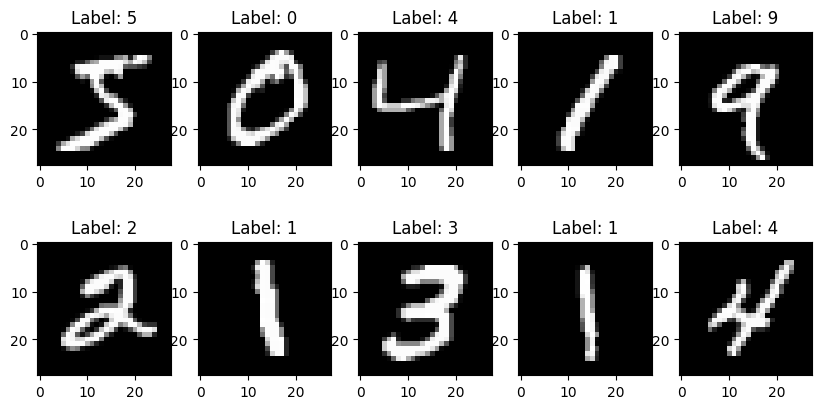

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the first 10 images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(y_train[i]))

In [4]:
# TODO Examine the shapes of X_train, y_train, X_test, y_test 
# Hint: print the shape attribute of each numpy array
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Formatting our Input
Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

![flatten.png](images/flatten.png)

In [5]:
# TODO Reshape the X_train and X_test data to be 784-length vectors
# Hint: Use the reshape method of numpy arrays, with the arguments (length of X_train or X_test, 784)
X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

# Given -> We'll change the integers into 32-bit floating point nums
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# TODO Normalize each value in X_train and X_test to be between 0 and 1 by dividing by 255
# Hint: Divide each numpy array by 255
X_train /= 255
X_test /= 255

We then want to modify our classes (unique digits) to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

In [6]:
num_classes = 10

# TODO Convert the labels from digits to one-hot-encoded vectors
# Hint: Use the to_categorical function from keras.utils with the arguments (y_train or y_test, num_classes)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Building a Model
We'll be using the Keras framework to build a Multi-layer Perceptron consisting of one hidden layer. We'll start by setting up the model.

In [7]:
# TODO create the model using the Sequential class
# Hint: Use the Sequential class constructor
model = Sequential()

2024-10-23 18:03:12.219407: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## The first hidden layer

Now we'll add a hidden layer of size 32. This will be a Dense layer, practically a set of 32 nodes (artifical neurons). Each node receives an element from each input vector, and then applies some weight and bias to it. Each of these layers will need an activation function, which is a non-linear function applied to the output of a layer. For our hidden layer, we will be using ReLU as the activation function.

ReLU is defined as: $$f(x) = max(0, x)$$

![relu.jpg](images/relu.jpg)

In [8]:
# TODO Add a Dense layer with 32 nodes to the model
# Hint: Use the add method of the model with the arguments Dense(32, input_shape=(784,)) 
#       *** (784,) as a shape indicates the 784-length vector of our input
model.add(Dense(32, input_shape=(784,)))

# TODO Add a ReLU activation layer to the model
# Hint: Use the add method of the model with the argument Activation('relu')
model.add(Activation('relu'))

# OPTIONAL: Add a Dropout layer to the model
# Dropout layers are used to prevent overfitting by randomly setting some of the weights to 0 during training
# Hint: Use the add method of the model with the argument Dropout(some probability)
model.add(Dropout(0.2))

In [9]:
# OPTIONAL: Add another Dense layer with some amount of nodes
#           Don't forget the activation function and dropout layer if you want to use dropout
# Hint: Do the same as the first Dense layer, but with a different number of nodes/dropout
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The Final Output Layer

The output layer of a model for classification will be equal to the number of classes (10 in our case). We first need a dense layer to connect to the previous fully-connected layer. Then, we apply a softmax activation function, which represents the output in terms of a probability distribution for each of the classes. All of the values output from the softmax are non-negative and sum to 1.

The output of the softmax would be something like what we saw earlier:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```

where each value indicates the probability of the input being in each class according to the model.

In [10]:
# TODO Add a Dense layer with 10 nodes to the model
# Hint: Use the add method of the model specifying Dense(10)
model.add(Dense(10))

# TODO Add a softmax activation layer to the model
# Hint: Use the add method of the model with the argument Activation('softmax')
model.add(Activation('softmax'))

# TODO Visualize the model using the summary method of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                1

# Compiling and Training the Model

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

![gradient_descent.jpg](images/gradient_descent.png)

![learning_rate.jpg](images/learning_rate.png)

It might seem that smaller learning rates are better. However, it's important to not get stuck in local minima, which does not allow models to converge. This may call for a larger learning rate to "jump" out of the local minimum.

![comp](images/complicated_loss_function.png)

In [11]:
# TODO We are going to compile the model using the Adam optimizer, categorical crossentropy loss, and accuracy as a metric
# Hint: Use the compile method of the model with the arguments (optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Now let's train the model!

We will pick a batch size to train the model. 

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!


In [18]:
# TODO Train the model with a batch_size of 128 for 10 epochs and a verbose level of 1
# Hint: Use the fit method of the model with the arguments (X_train, y_train, batch_size=128, epochs=10, verbose=1)
model_fit = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.9333
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2198 - accuracy: 0.9334
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2212 - accuracy: 0.9333
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2152 - accuracy: 0.9362
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2153 - accuracy: 0.9356
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2159 - accuracy: 0.9346
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2074 - accuracy: 0.9371
Epoch 8/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2104 - accuracy: 0.9369
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2053 - accuracy: 0.9391
Epoch 10/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.9381

# Evaluating on Test Data

So we've trained the model on data it sees during every epoch during training. How about on data it has not seen yet?

We will also plot the training loss and accuracy to look at their curves during training.

313/313 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9625
Test loss:  0.14151427149772644
Test accuracy:  0.9624999761581421


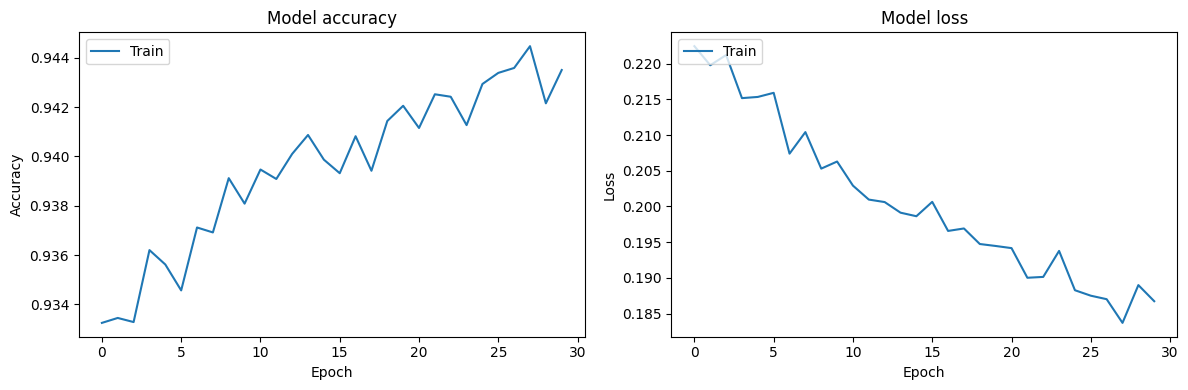

In [19]:
# TODO Evaluate the model on the test data
# Hint: Create a score variable and set it equal to the output of
# the evaluate method of the model with the arguments (X_test, y_test)
score = model.evaluate(X_test, y_test)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])


# Plot training & validation accuracy values
history = model_fit.history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.tight_layout()
plt.show()

# Sanity Checks/Inspecting Output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Convert y_test back from one-hot encoding to integer labels
y_test_labels = np.argmax(y_test, axis=-1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test_labels)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test_labels)[0]


In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], np.argmax(y_test[correct])))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], np.argmax(y_test[incorrect])))
    
plt.tight_layout()

# CIFAR-10 and CNNs

Now that we've trained a simple model on MNIST, how does that extend to other datasets, and to other types of models like Convolutional Neural Networks?

In the cells below, I'll walk through the setup, training, and testing of a simple MLP and CNN on the CIFAR-10 dataset. There are no TODOs in here, so you can run each cell sequentially without having to write the code yourself. The goal of this section is to explore how this simple example can extend further to more complicated problems.

The CIFAR-10 dataset is a collection of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images. The classes represent common objects such as airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. This dataset is widely used for training machine learning and computer vision algorithms, and it presents a more complex challenge compared to the MNIST dataset due to the variability in object appearances and backgrounds.

In [ ]:
from keras.datasets import cifar10

# Loading the CIFAR-10 dataset in

These images are (32, 32, 3), with the third dimension being the color channels for R G and B. For this type of network, I still do need to flatten them.

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_test = X_test.reshape(X_test.shape[0], 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

In [8]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(3072,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])